In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fwidataset/FWI Dataset.xlsx


Module 1
Collected a structured dataset containing relevant environmental features and FWI target variable.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Imported Successfulley")

Imported Successfulley


In [105]:
import pandas as pd
df = pd.read_excel("/kaggle/input/fwidataset/FWI Dataset.xlsx")   
print("Dataset loaded succesfully")


Dataset loaded succesfully


In [83]:
print("\nBasic Information About Dataset:")
print(df.info())


Basic Information About Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB
None


In [84]:
print("\nFirst 4 Rows of Dataset")
display(df.head())
print("\nLast 4 Rows of Dataset")
display(df.tail())




First 4 Rows of Dataset


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia



Last 4 Rows of Dataset


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes


In [107]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0


In [110]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


Module 2
****Checked for missing or null values and handled them appropriately.

In [87]:
print("Before:\n", df.isnull().sum())
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object','category']).columns
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

print("\nAfter:\n", df.isnull().sum())


Before:
 day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

After:
 day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [88]:
def iqr_outlier_flags(series):
    q1 = series.quantile(0.25); q3 = series.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr; high = q3 + 1.5*iqr
    return ~series.between(low, high)
outlier_cols = []
for c in num_cols:
    mask = iqr_outlier_flags(df[c])
    n = mask.sum()
    if n>0:
        outlier_cols.append((c, int(n)))
print("Outliers flagged per column:", outlier_cols)


Outliers flagged per column: [('Temperature', 2), ('Ws', 8), ('Rain', 35), ('FFMC', 16), ('DMC', 12), ('ISI', 4), ('BUI', 12)]


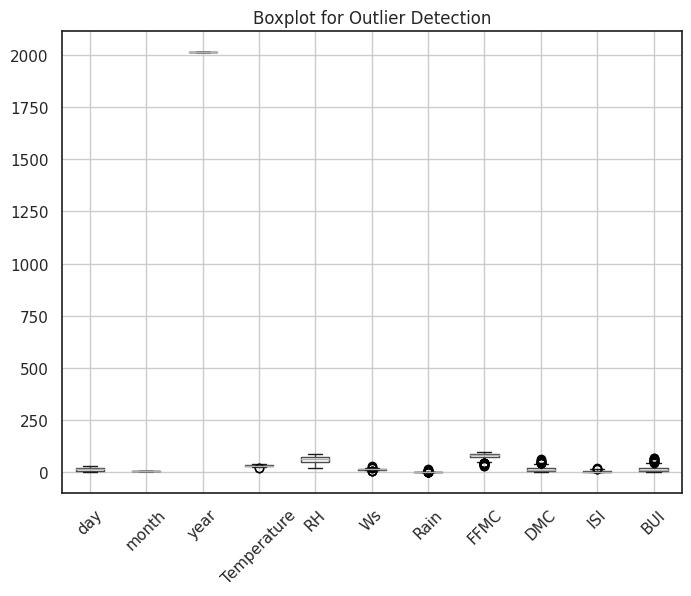


Outliers in day:
Series([], Name: day, dtype: int64)

Outliers in month:
Series([], Name: month, dtype: int64)

Outliers in year:
Series([], Name: year, dtype: int64)

Outliers in Temperature:
93     22
105    22
Name: Temperature, dtype: int64

Outliers in RH:
Series([], Name: RH, dtype: int64)

Outliers in Ws:
2      22
52     22
105    26
176     9
199     9
232     8
237     6
241    29
Name: Ws, dtype: int64

Outliers in Rain:
1       1.3
2      13.1
3       2.5
14      3.1
38      1.4
91     16.8
92      7.2
93     10.1
94      3.8
101     1.8
102     1.8
104     4.6
105     8.3
116     5.8
120     1.8
121     1.4
123     4.0
124     2.0
129     1.3
134     2.0
138     4.7
139     8.7
140     4.5
151     1.7
152     2.2
159     6.0
160     1.9
161     3.8
162     2.9
188     3.1
189     2.9
218     4.1
219     6.5
237     2.0
240     4.4
Name: Rain, dtype: float64

Outliers in FFMC:
2      47.1
3      28.6
15     36.1
16     37.3
92     46.0
93     30.5
94     42.6
104    40.9
1

In [89]:

plt.figure(figsize=(8, 6))
df.boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()
def detect_outliers_iqr(dataframe):
    outlier_indices = {}

    for column in dataframe.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)][column]
        outlier_indices[column] = outliers
        print(f"\nOutliers in {column}:")
        print(outliers)
    return outlier_indices

outlier_results = detect_outliers_iqr(df)

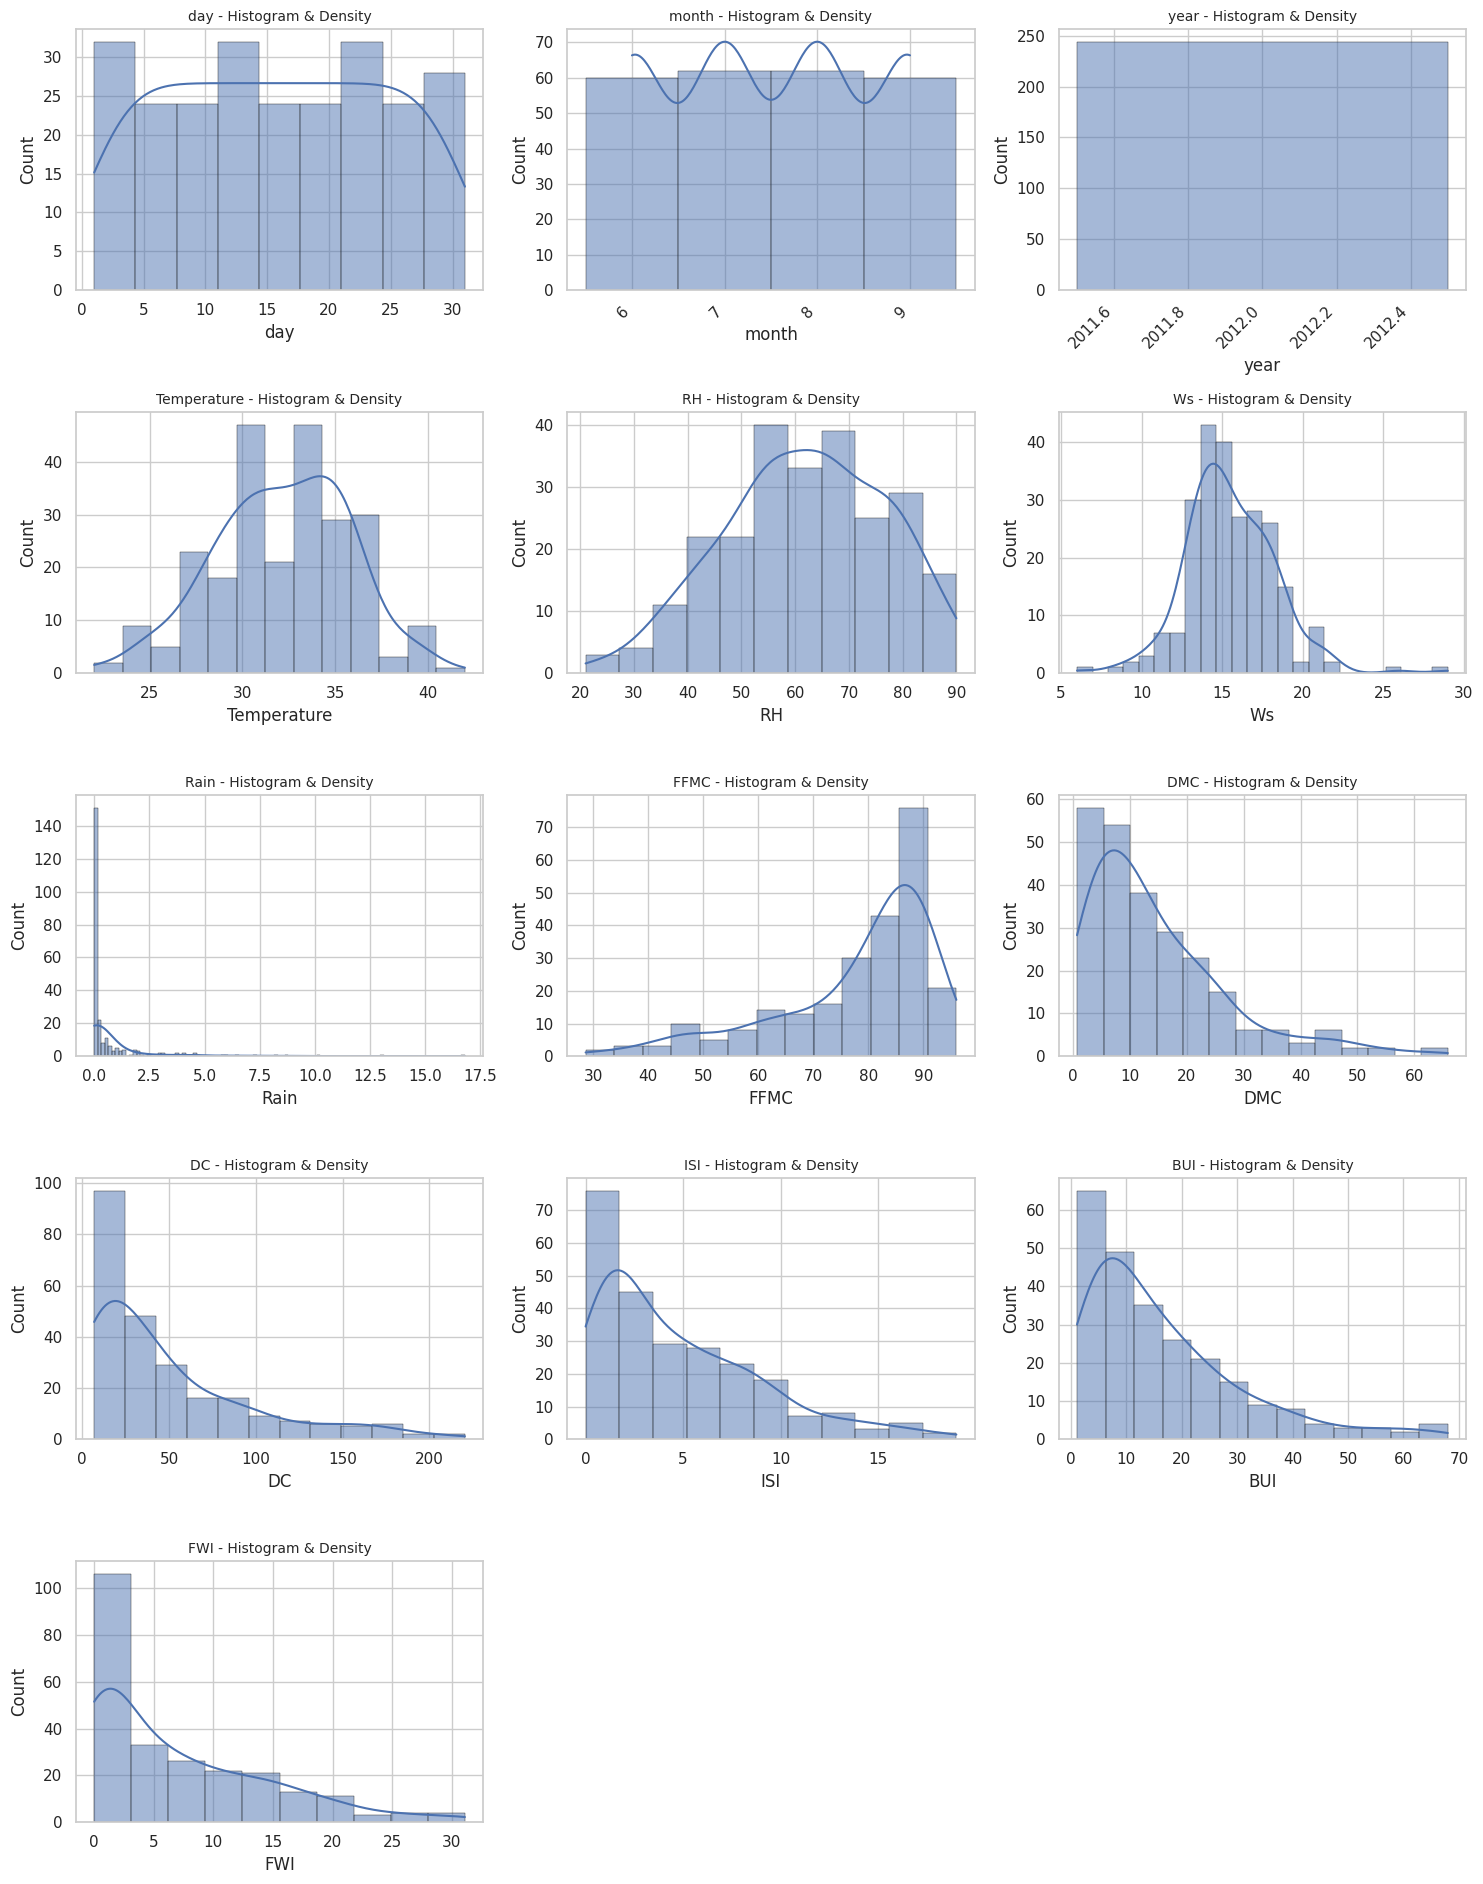

In [103]:

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------- safety checks -------
if 'df' not in globals():
    raise NameError("DataFrame 'df' not found. Load your dataset first (e.g. df = pd.read_excel(...)).")
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
df = df.replace([np.inf, -np.inf], np.nan).copy()
num_cols = df.select_dtypes(include='number').columns.tolist()
num_cols = [c for c in num_cols if df[c].notna().sum() > 0]
sns.set_theme(style="whitegrid")
cols_per_row = 3
rows = (len(num_cols) + cols_per_row - 1) // cols_per_row
fig, axes = plt.subplots(rows, cols_per_row, figsize=(5*cols_per_row, 3.8*rows), squeeze=False)

color = "#4C72B0"     # pleasant blue
for ax, col in zip(axes.flat, num_cols):
    data = df[col].dropna()
    if data.nunique() <= 10:  # categorical-like -> use count histogram
        sns.histplot(data, kde=True, stat='count', discrete=True, ax=ax, color=color, edgecolor='k', linewidth=0.3)
    else:
        sns.histplot(data, kde=True, ax=ax, color=color, edgecolor='k', linewidth=0.3)
    ax.set_title(f"{col} - Histogram & Density", fontsize=10)
    ax.set_ylabel("Count")
    if data.nunique() <= 10:
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
for ax in axes.flat[len(num_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


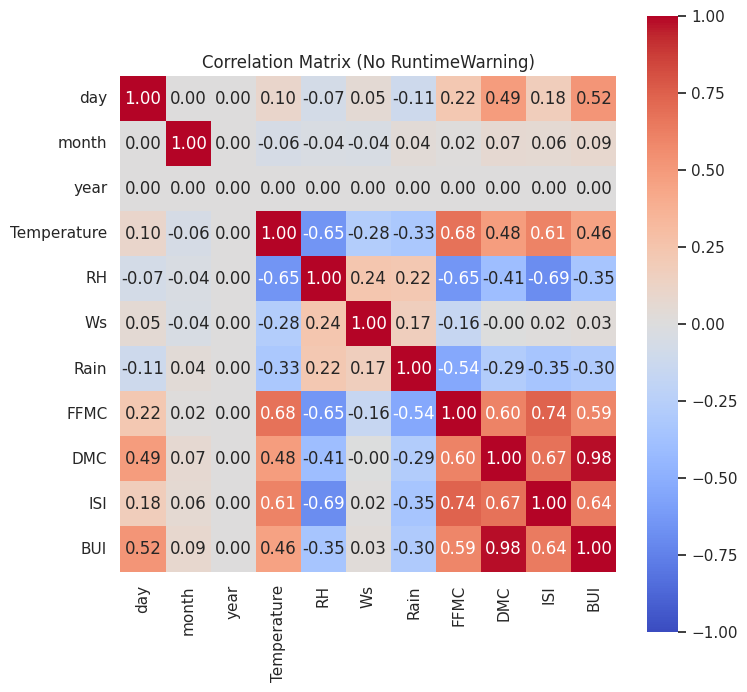

In [94]:
corr_matrix = df.corr(numeric_only=True)

# Replace NaN with 0 (or any neutral value)
corr_matrix = corr_matrix.fillna(0)

plt.figure(figsize=(8,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    square=True,
    fmt='.2f',
    vmin=-1, vmax=1
)
plt.title("Correlation Matrix (No RuntimeWarning)")
plt.show()


Extended pairplot features: ['ISI', 'DMC', 'BUI', 'DC', 'FFMC', 'RH', 'Temperature', 'day']


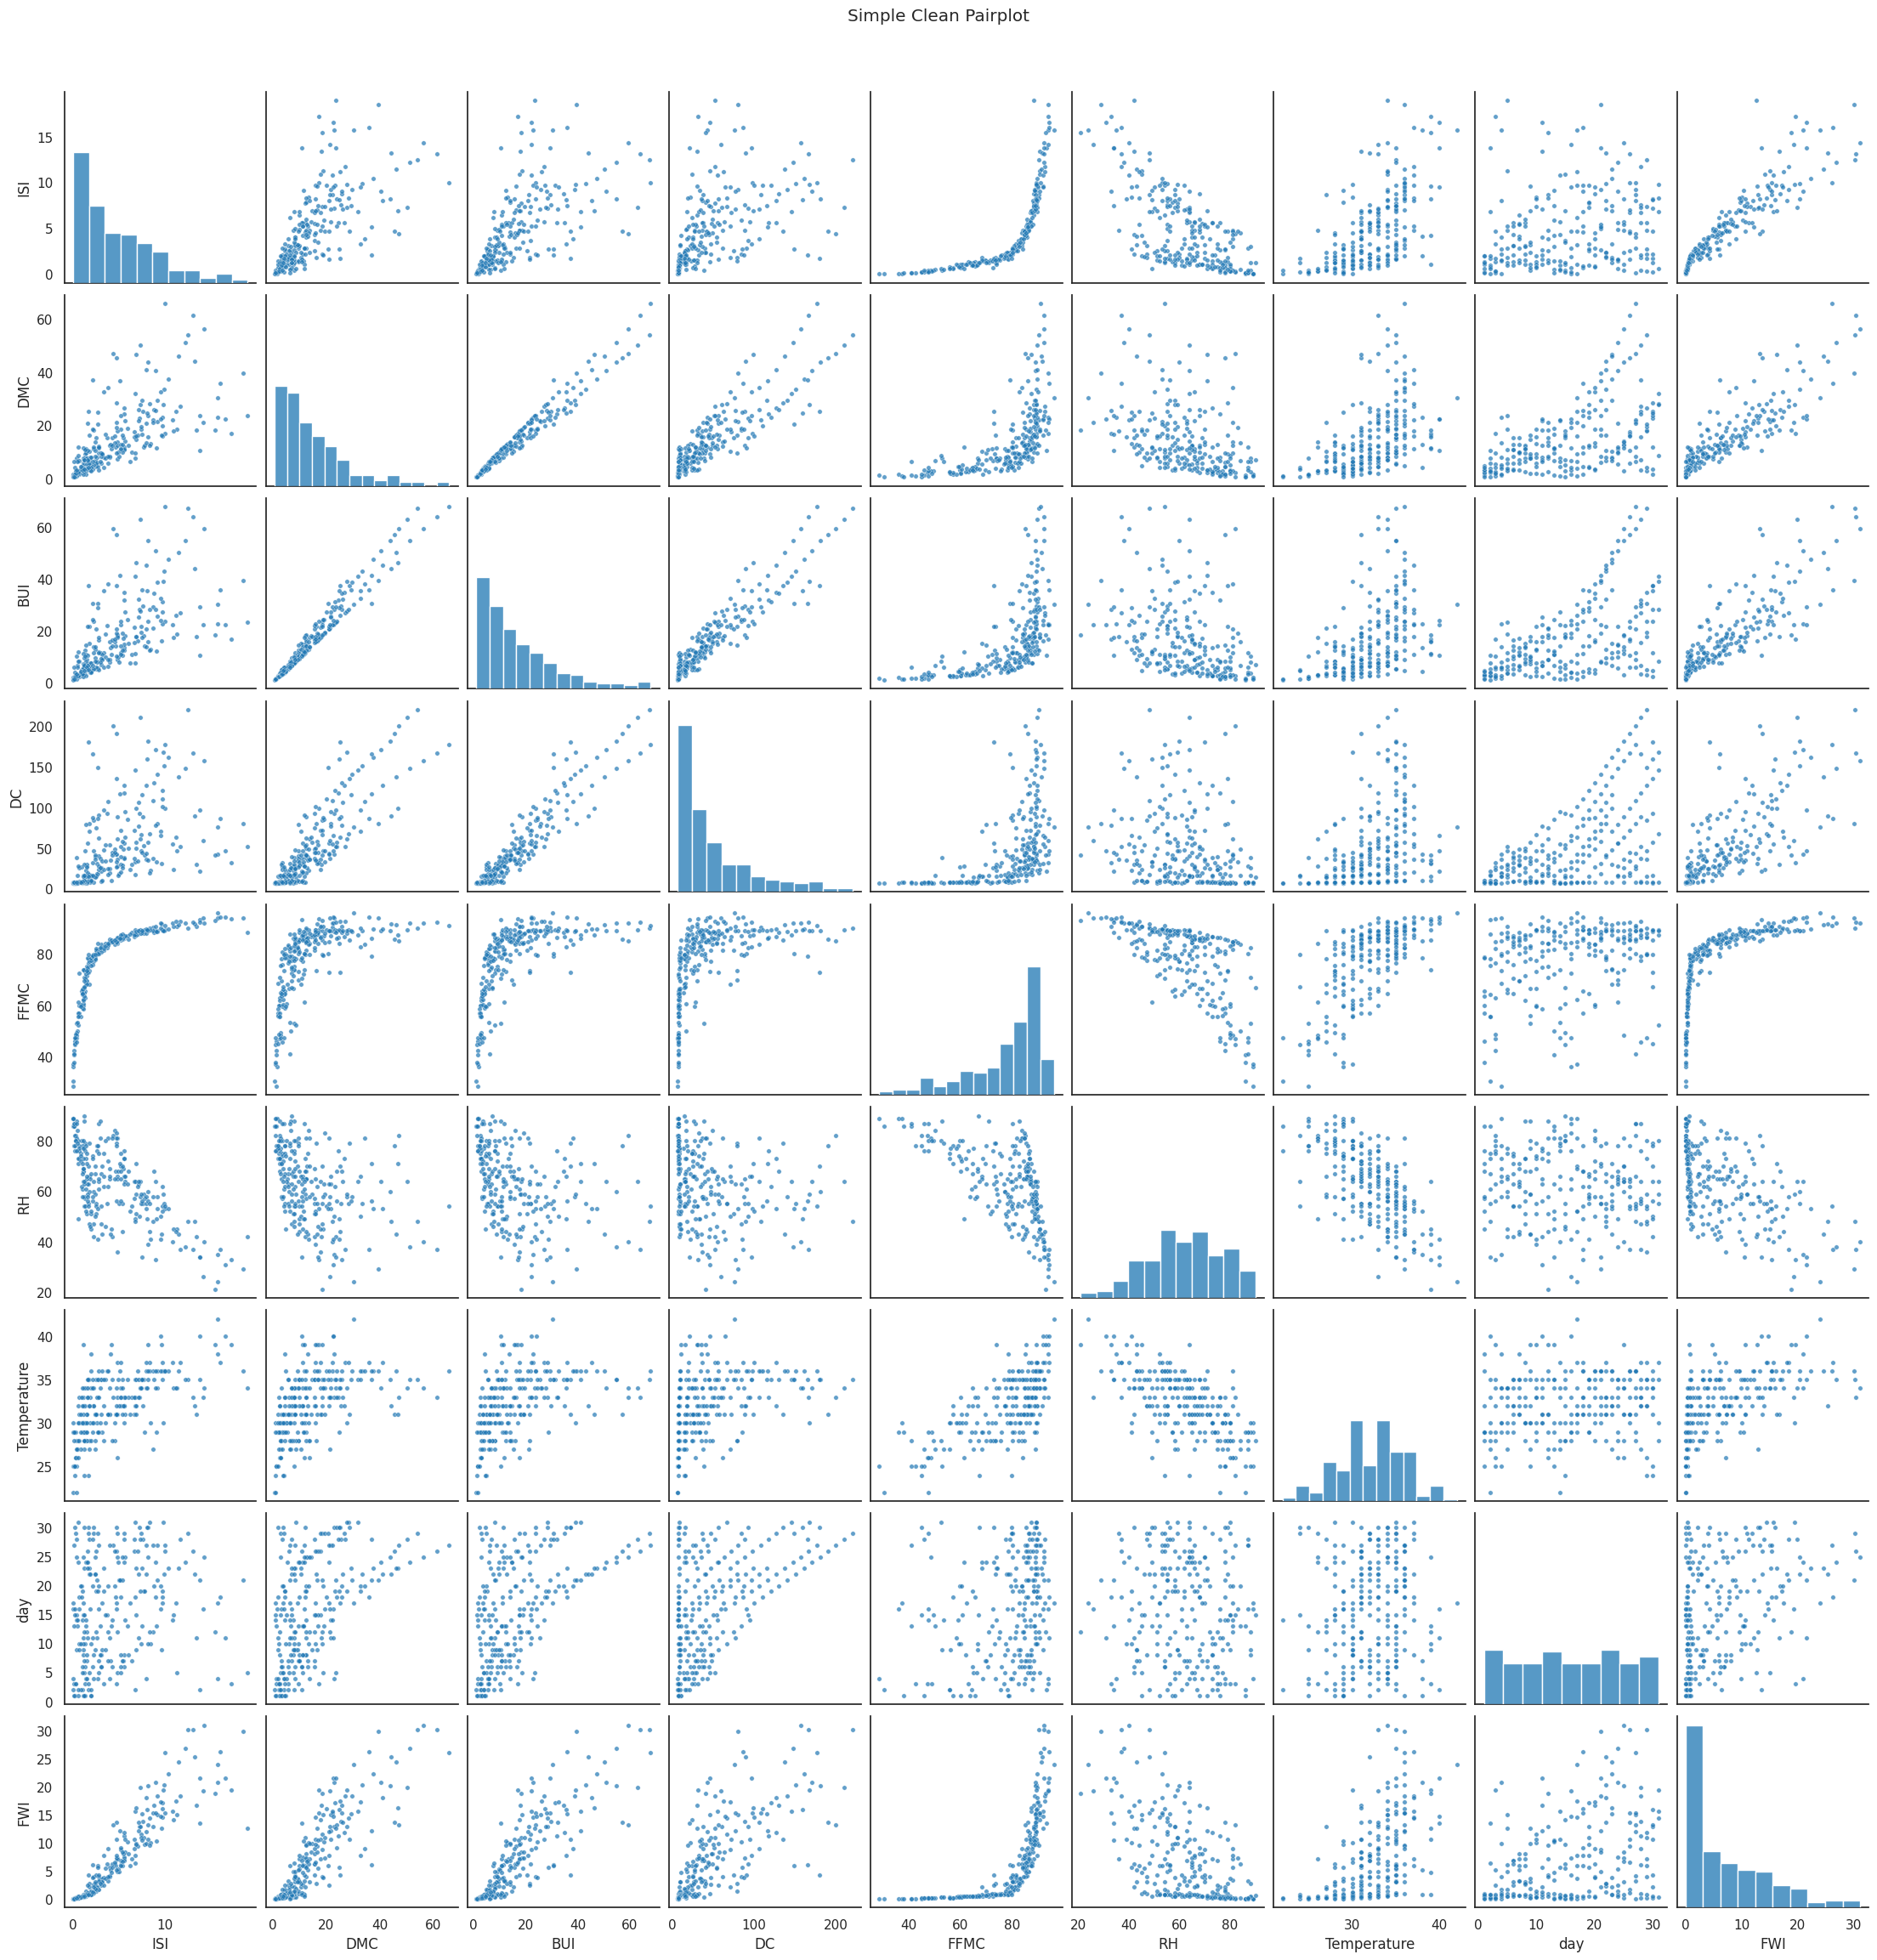

In [98]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
top_n = 8
top_feats_extended = (
    corr['FWI']
    .abs()
    .sort_values(ascending=False)
    .drop('FWI')
    .head(top_n)
    .index
    .tolist()
)
print("Extended pairplot features:", top_feats_extended)
pairplot_df = df[top_feats_extended + ['FWI']].dropna().copy()
if len(pairplot_df) > 3000:
    pairplot_df = pairplot_df.sample(3000, random_state=42)

# Clean white style
sns.set_theme(style="white")
g = sns.pairplot(
    pairplot_df,
    vars=top_feats_extended + ['FWI'],
    diag_kind="hist",         # histogram diagonal
    corner=False,             # full pairplot grid
    plot_kws={"s": 15, "alpha": 0.7, "color": "#1f77b4"},   # nice blue tone (same as your screenshot)
    diag_kws={"color": "#1f77b4"}
)
g.fig.suptitle("Simple Clean Pairplot", y=1.03)
plt.show()


In [101]:
from sklearn.preprocessing import LabelEncoder  
df.columns = df.columns.str.strip()
le_region = LabelEncoder()
df['Region_encoded'] = le_region.fit_transform(df['Region'])
print("Encoded Values:\n")
print(df[['Region', 'Region_encoded']].head())
print("\nRegion Mapping:")
region_mapping = dict(zip(le_region.classes_, le_region.transform(le_region.classes_)))
print(region_mapping)
df['Region_encoded'] = df['Region_encoded'].astype('category')
print(df[['Region', 'Region_encoded']].dtypes)


Encoded Values:

   Region  Region_encoded
0  Bejaia               0
1  Bejaia               0
2  Bejaia               0
3  Bejaia               0
4  Bejaia               0

Region Mapping:
{'Bejaia': 0, 'Sidi-Bel Abbes': 1}
Region              object
Region_encoded    category
dtype: object


In [102]:

df.to_csv("/kaggle/working/cleaned_fwi.csv", index=False)
print(" Cleaned dataset saved successfully!")
print(" File location: /kaggle/working/cleaned_fwi.csv")
df_check = pd.read_csv("/kaggle/working/cleaned_fwi.csv")
print("\n Preview of saved file:")
display(df_check.head())


 Cleaned dataset saved successfully!
 File location: /kaggle/working/cleaned_fwi.csv

 Preview of saved file:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Region_encoded
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia,0
